In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings("ignore") # Ignore warnings

In [138]:
cols = ["fLength", "fWidth", 'fSize', "fConc", 'fConc1', "fAsym", 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', "class"]
df = pd.read_csv("../csvs/magic04.data", names=cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [139]:
# Find NULL rows
df.isnull().sum() # No null rows
# Find duplicate rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [140]:
# Convert class column to integer
df["class"] = (df["class"] == 'g').astype(int)
# df["class"] = pd.get_dummies(df["class"], drop_first=True, dtype=int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


# Visualize the Data

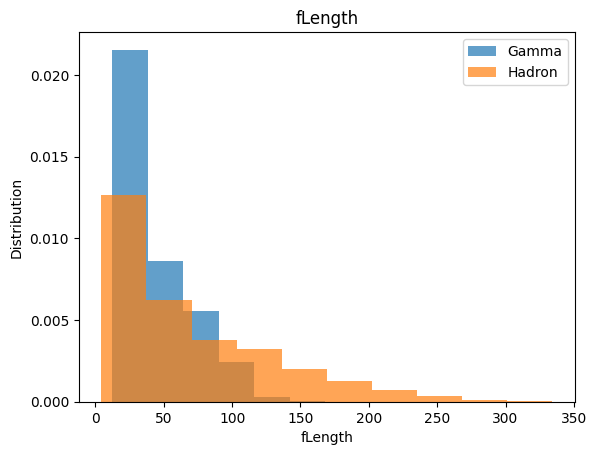

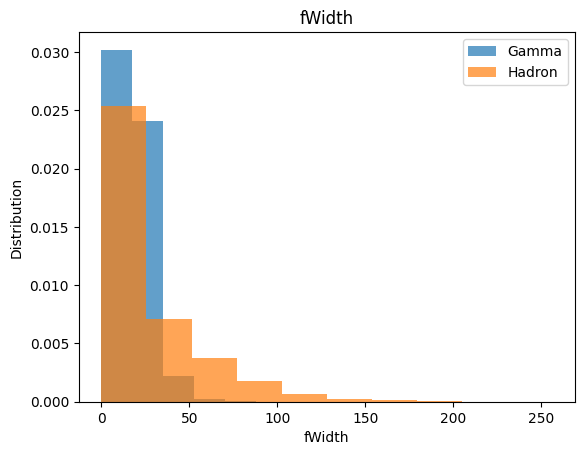

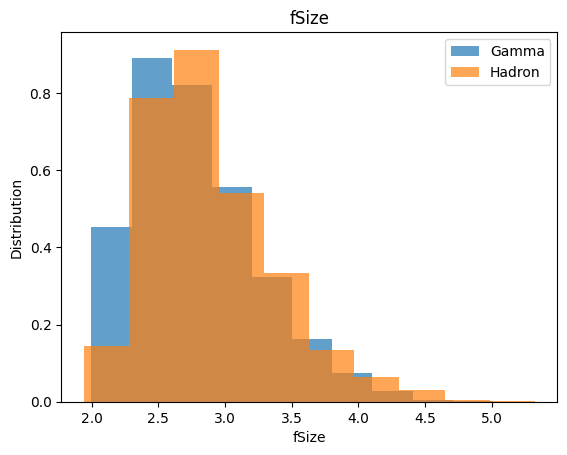

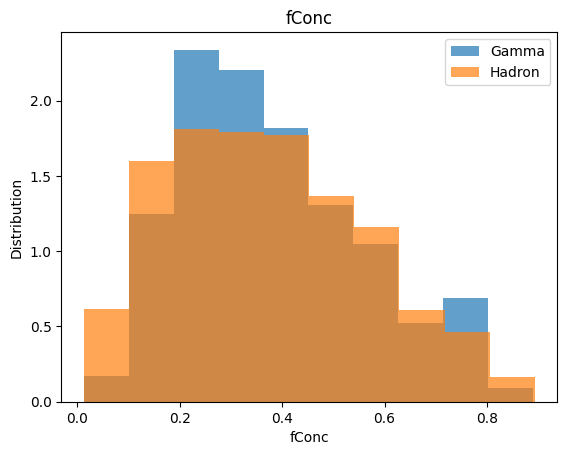

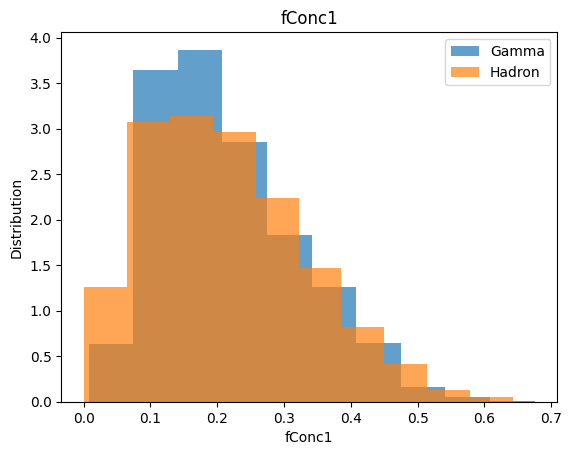

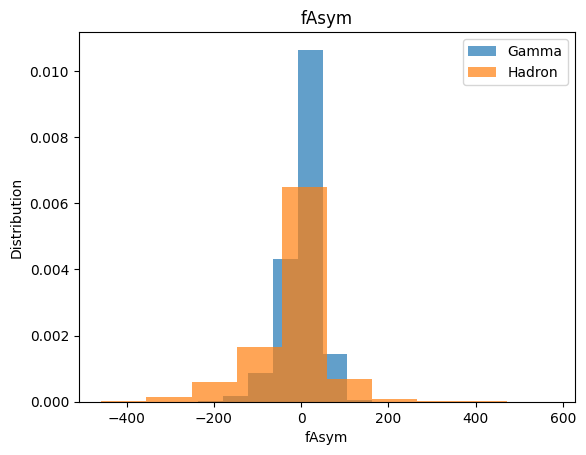

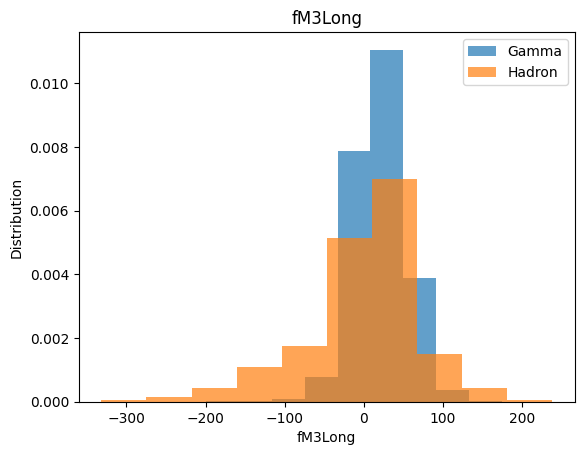

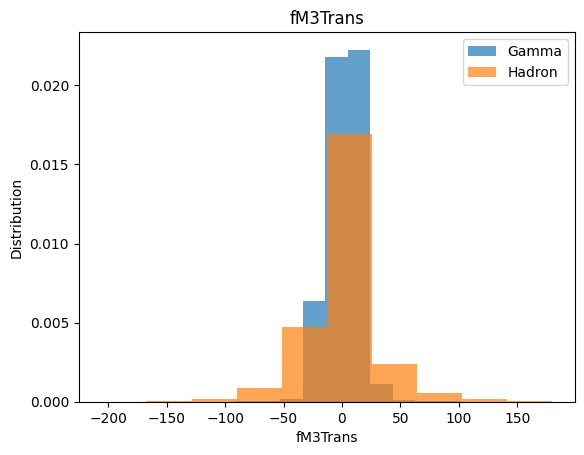

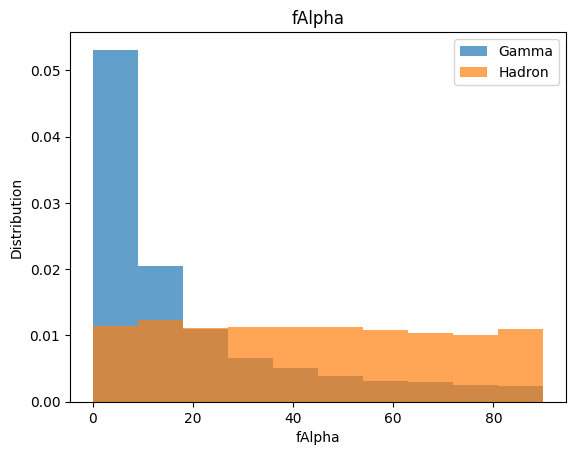

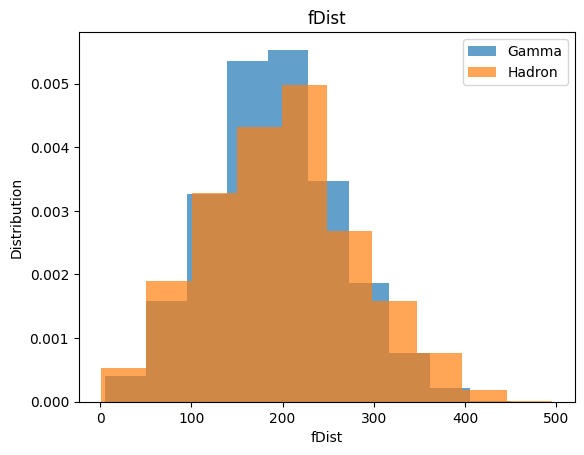

In [141]:
#  Visualize each feature in relation to the class

for col in df.columns[:-1]: # Omit the class
    plt.hist(df[df["class"] == 1][col], label="Gamma", density=True,  alpha=0.7)
    plt.hist(df[df["class"] == 0][col], label="Hadron", density=True,  alpha=0.7)
    
    plt.xlabel(col)
    plt.ylabel("Distribution")
    plt.title(col)
    plt.legend()
    plt.show()

In [142]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [143]:
# Split the dataset into training, validation and testing sub-datasets

train, validate, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])
print(len(train))
print(len(validate))
print(len(test))
train

11343
3781
3781


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
1621,33.8872,15.3817,2.5786,0.4011,0.2150,-31.4705,20.0251,-8.7236,4.1070,203.1210,1
6298,56.2513,26.6153,3.2665,0.1971,0.1080,55.8478,45.2993,-17.1503,9.9628,114.0990,1
5286,37.2195,10.3329,2.4141,0.5588,0.3449,-23.3326,-21.4781,-8.1819,11.3860,187.7220,1
6527,82.0912,35.5279,3.3356,0.2073,0.1263,-47.8773,-37.1067,-20.0705,2.8750,280.8250,1
15262,13.1727,10.6312,2.3701,0.7804,0.4627,-13.7368,-3.9760,11.0204,69.0310,223.8520,0
...,...,...,...,...,...,...,...,...,...,...,...
7533,13.0916,10.5668,2.1351,0.7766,0.4872,-13.2254,-4.3567,9.9715,51.2880,216.5620,1
12978,92.1397,53.6752,3.0382,0.2175,0.1460,-26.7572,-121.8984,21.4054,9.0489,103.5638,0
14836,82.5499,10.6383,3.0543,0.1970,0.1179,-37.8493,51.3596,11.1925,35.3257,104.7447,0
16117,71.7611,20.1438,2.8363,0.5026,0.3197,-87.9786,-47.0656,-14.9389,48.4428,288.6459,0


# Scaling And Normalization

- Since there are outliers in the dataset, we go with Standardization, which is more robust to outliers.


In [144]:
# MIN-MAX SCALING
# Subtract each value from the column's minimum, and divide by the column's range
# The result is always between 1 and 0

#  Standardization
# = (value - mean) / std
df.describe() # Look at the ranges of values

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000
mean,53.161416,22.145872,2.824643,0.380247,0.214560,-4.177867,10.618826,0.259364,27.551644,193.712554,0.652314
std,42.259789,18.300664,0.472377,0.182709,0.110384,59.010059,50.900687,20.775268,26.083055,74.685712,0.476248
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.359700,11.874200,2.477100,0.235800,0.128500,-20.479100,-12.769300,-10.835800,5.516400,142.269000,0.000000
50%,37.129500,17.143800,2.740000,0.354000,0.196400,4.062900,15.338000,0.750000,17.533000,191.832000,1.000000
75%,69.975400,24.712400,3.101100,0.503500,0.285000,24.133500,35.869400,10.948900,45.704000,240.409000,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [145]:

#* Scaling
# for col in df.columns[:-1]:
#     df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
# df

#* Standardization
normalized_df = df.copy()
for col in df.columns[:-1]:
    normalized_df[col] = (normalized_df[col] - normalized_df[col].mean()) / normalized_df[col].std()

normalized_df
    

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.576546,-0.335713,-0.380508,0.063231,-0.148208,0.540218,0.223812,-0.407314,0.480786,-1.497338,1
1,-0.510126,-0.569508,-0.648091,0.821266,1.474316,0.516015,0.259426,-0.491775,-0.812433,0.154627,1
2,2.576695,6.223005,2.617735,-1.876462,-1.774356,2.049123,-1.482825,-2.188918,1.894270,0.844545,1
3,-0.694377,-0.687028,-1.029143,1.283201,1.609300,0.531919,-0.335597,-0.356706,-0.655699,-1.030660,1
4,0.519993,0.479470,0.712264,-0.347257,-0.284098,-0.022875,0.352327,1.038732,-0.878104,2.179124,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,-0.751940,-0.613577,-0.441476,1.124479,1.620171,0.329430,0.017793,0.125978,-0.963413,-1.163365,0
19016,-0.573032,-0.843897,-1.180082,0.847537,0.578349,0.699194,0.050421,-0.155115,2.271431,0.719595,0
19017,0.527312,1.387088,1.320254,-1.305610,-1.446409,-0.087752,0.597976,-0.468132,0.105320,0.840911,0
19018,1.593763,2.992019,2.475264,-1.564491,-1.325014,0.169160,-2.045969,-3.085316,2.190532,2.873428,0


In [146]:
normalized_df.describe() # Confirm if ranges have changed

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,1.890500e+04,1.890500e+04,1.890500e+04,1.890500e+04,1.890500e+04,18905.000000,1.890500e+04,1.890500e+04,1.890500e+04,1.890500e+04,18905.000000
mean,9.621737e-17,2.044619e-16,1.503396e-16,-9.020379e-17,8.644529e-18,0.000000,-2.405434e-17,1.616151e-17,-9.621737e-17,2.134823e-16,0.652314
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.476248
min,-1.156606e+00,-1.210113e+00,-1.869998e+00,-2.009460e+00,-1.941048e+00,-7.689168,-6.726802e+00,-9.923052e+00,-1.056304e+00,-2.576530e+00,0.000000
25%,-6.815395e-01,-5.612732e-01,-7.357332e-01,-7.905843e-01,-7.796428e-01,-0.276245,-4.594855e-01,-5.340564e-01,-8.448107e-01,-6.888005e-01,0.000000
50%,-3.793657e-01,-2.733273e-01,-1.791857e-01,-1.436551e-01,-1.645149e-01,0.139650,9.271336e-02,2.361634e-02,-3.841055e-01,-2.517956e-02,1.000000
75%,3.978719e-01,1.402424e-01,5.852468e-01,6.745844e-01,6.381410e-01,0.479772,4.960753e-01,5.145318e-01,6.959444e-01,6.252394e-01,1.000000
max,6.649716e+00,1.279932e+01,5.289544e+00,2.806386e+00,4.173088e+00,9.818980,4.473460e+00,8.644492e+00,2.394212e+00,4.041582e+00,1.000000


In [147]:
# Instead of doing it manually, use Sklearn Library
def normalize_f(dataframe, sampler=False):
    normalized_df = dataframe.copy()

    X = normalized_df[normalized_df.columns[:-1]].values
    y = normalized_df[normalized_df.columns[-1]].values

    # Find out the sample of each class
    print(normalized_df[normalized_df["class"] == 1].shape) # 12322
    print(normalized_df[normalized_df["class"] == 0].shape) # 6573

    # They should both have the same number of dimensions
    print(X.shape) #2D
    print(y.shape) #1D
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X) # Standaridize feature values

    # Oversample so that both class 1 and 0 have the same no. of items
    if sampler:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    print((y == 1).shape)
    print((y==0).shape)
    # Convert y to 2D
    y = np.reshape(y, (-1, 1))

    # combine the 2 arrays
    data = np.hstack((X, y))
    return data, X, y

In [ ]:
train, X_train, y_train = normalize_f(train, sampler=True)
validate, X_validate, y_validate = normalize_f(validate, sampler=False)
test, X_test, y_test = normalize_f(test, sampler=False)

(7371, 11)
(3972, 11)
(11343, 10)
(11343,)
(14742,)
(14742,)
(2479, 11)
(1302, 11)
(3781, 10)
(3781,)
(3781,)
(3781,)
(2482, 11)
(1299, 11)
(3781, 10)
(3781,)
(3781,)
(3781,)


array([[-0.45491931, -0.36736511, -0.51924748, ..., -0.89921379,
         0.12093221,  1.        ],
       [ 0.060945  ,  0.23455005,  0.92794538, ..., -0.67481534,
        -1.0804166 ,  1.        ],
       [-0.3780544 , -0.6378883 , -0.86531991, ..., -0.6202773 ,
        -0.08687676,  1.        ],
       ...,
       [ 0.05131238,  0.02201296,  0.18993803, ..., -0.69404468,
        -0.22873584,  0.        ],
       [ 3.24361108,  3.75216057,  3.13186927, ...,  0.69667928,
         1.36403714,  0.        ],
       [-0.62146496, -0.1790898 , -0.53734002, ...,  2.22546895,
        -1.11771668,  0.        ]], shape=(14742, 11))

# KNN

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [184]:
knn_model = KNeighborsClassifier(n_neighbors=5)
# Fit the training dataset into the model
knn_model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [185]:
y_pred = knn_model.predict(X_validate)

In [186]:
y_pred # Predicted values from the validation dataset

array([0, 1, 1, ..., 1, 1, 1], shape=(3781,))

In [187]:
y_validate # The actual targets for the validation dataset

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], shape=(3781, 1))

In [188]:
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1302
           1       0.86      0.86      0.86      2479

    accuracy                           0.82      3781
   macro avg       0.80      0.80      0.80      3781
weighted avg       0.82      0.82      0.82      3781



- Precision - Out of all the values that have been marked 1 or 0, how many of them are true?
- Recall - Out of those that are true, how many have we gotten right?
- f1-score is a combination of both
- accuracy - The percentage accuracy of the model